#  Classification - Loan Eligibility Prediction


# Problem Statement :-
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. Customers first apply for a home loan after that company validates the customer’s eligibility for a loan. The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, that are eligible for loan amounts so that they can specifically target these customers.

# Business Goal :-
We are required to model to identify the key factors that are involved with whether or not a loan application will be accepted. It will be used by the management to understand how exactly the loan satues vary with the independent variables. They can accordingly manipulate the business strategy. the model will be a good way for management to understand the business strategy since we don't want to grant loans to applicants who are unable to repay them, since it would hurt the company.

In [238]:
#import libraies 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Reading and Understanding the Data

In [239]:
data = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [240]:
data.shape

(614, 13)

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [242]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observations:

1.There are 614 observations and 13 columns in the data.

2.ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, and Loan_Status are numeric data types. The rest of the variables are of the object data type.



3.Loan_ID column is an identifier. Let's check if each entry of the column is unique.

# Step 2 : Data Cleaning and Preparation

In [243]:
#checking missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

observations

1.There are several columns with less than 614 non-null entries i.e. these columns have missing values.


## Imputing missing values

In [244]:
#Imputing missing values with mode for the categorical variables 
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    data[col].fillna(value=data[col].mode()[0], inplace=True)

In [245]:
#Imputing null values in loan amount with the median
data.LoanAmount.fillna(value=data.LoanAmount.median(), inplace=True)

In [246]:
# glimplse of the dataset 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [247]:
#checking missing value after imputation.
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Finally, we need to encode our loan status column to make it eligible for modeling

In [248]:
data.replace({'Loan_Status':{'N':0,'Y': 1}},inplace = True)

In [249]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [250]:
data.replace({'Dependents': {'3+':4}},inplace = True)

In [251]:
data['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

#  Step 4:-  Exploratory Data Analysis

### Univariate Data Analysis 

In [252]:
#Creating a list of numerical columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

#printing summary statistics

data[num_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


## Observations:

1.The mean applicant income is around $5403.46


2.The minimum value for applicant income is $150 which is very small and could be an outlier since it is very far from both the mean and the median.


3.There are a good number of co applicants with no income, as can be observed by thet fact that the 25% quantile of coapplicants have an income of 0.

Checking the distribution and outliers for each column in the data

ApplicantIncome
Skew : 6.54


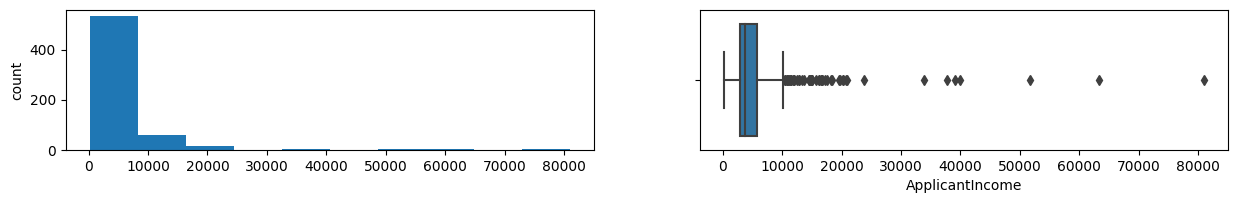

CoapplicantIncome
Skew : 7.49


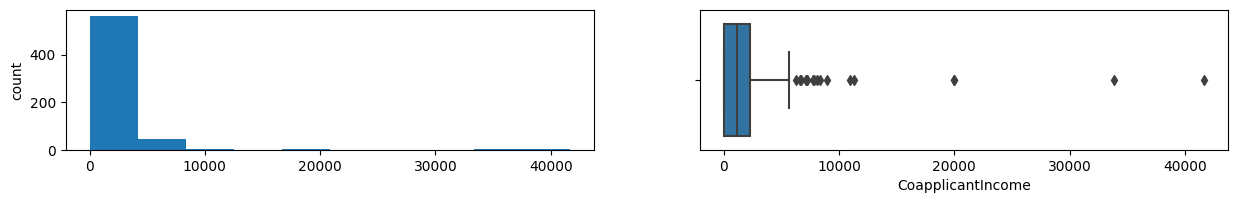

LoanAmount
Skew : 2.74


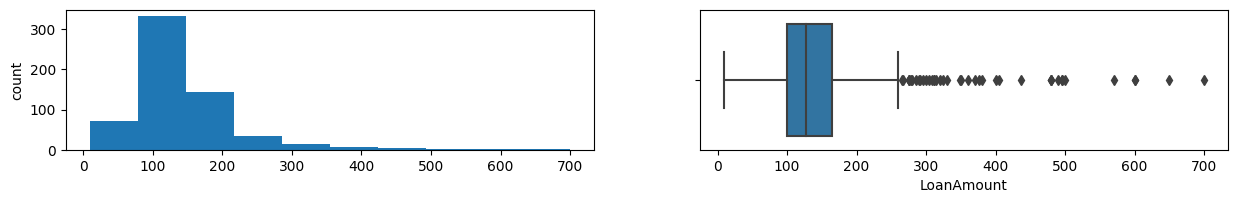

Loan_Amount_Term
Skew : -2.4


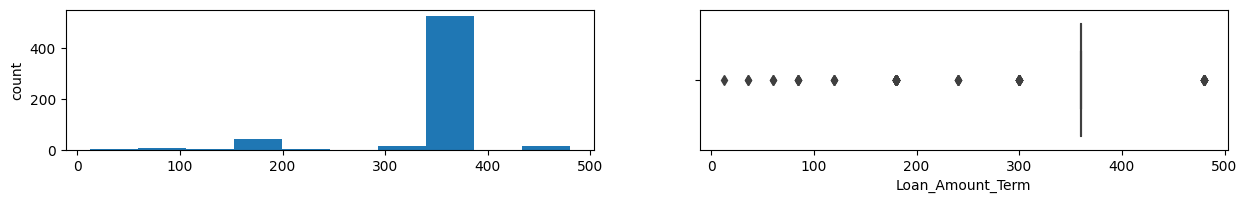

In [253]:
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'] :
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(2,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(2,2,2)
    sns.boxplot(x=data[col])
    plt.show()

### Observations:

1.ApplicantIncome and CoapplicantIncome are highly skewed to the right and have many outliers which can be expected as the data contains different types of areas - Rural, Urban & Semi-Urban.


2.Loan_Amount_Term is highly skewed to the left.

## Checking percentage of each category for categorical variables

In [254]:
#Creating list of categorical columns
cat_col= ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area', 'Loan_Status']

for col in cat_col:
    print(data[col].value_counts(normalize=True)) #Write your code here
    print('*'*40)

Male      0.81759
Female    0.18241
Name: Gender, dtype: float64
****************************************
Yes    0.653094
No     0.346906
Name: Married, dtype: float64
****************************************
0    0.586319
1    0.166124
2    0.164495
4    0.083062
Name: Dependents, dtype: float64
****************************************
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
****************************************
No     0.86645
Yes    0.13355
Name: Self_Employed, dtype: float64
****************************************
1.0    0.855049
0.0    0.144951
Name: Credit_History, dtype: float64
****************************************
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
****************************************
1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64
****************************************


## Observations:

1.The vast majority of applicants are male (81%).


2.65% of applicants are married, and 57% of them have no dependents.


3.78% of the applicants are graduates.


4.85% of the applicants are self employed.


5.84% of the applicants have credit histories that meet the required guidelines.


6.The property area among the applicants is roughly evenly split across semiurban, urban, and rural, with semi-urban having a slightly higher portion (37.9%)

## Bivariate Analysis

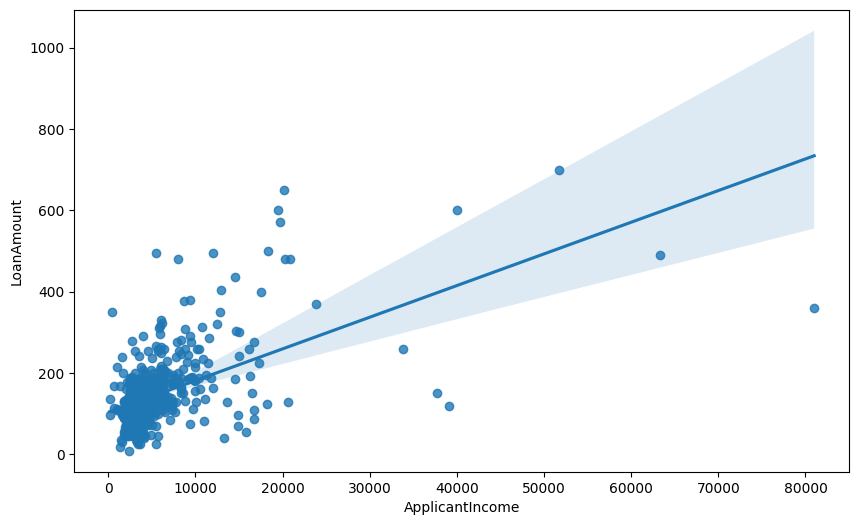

In [255]:
plt.figure(figsize=(10,6))
sns.regplot(x='ApplicantIncome',y='LoanAmount',data=data)
plt.show()

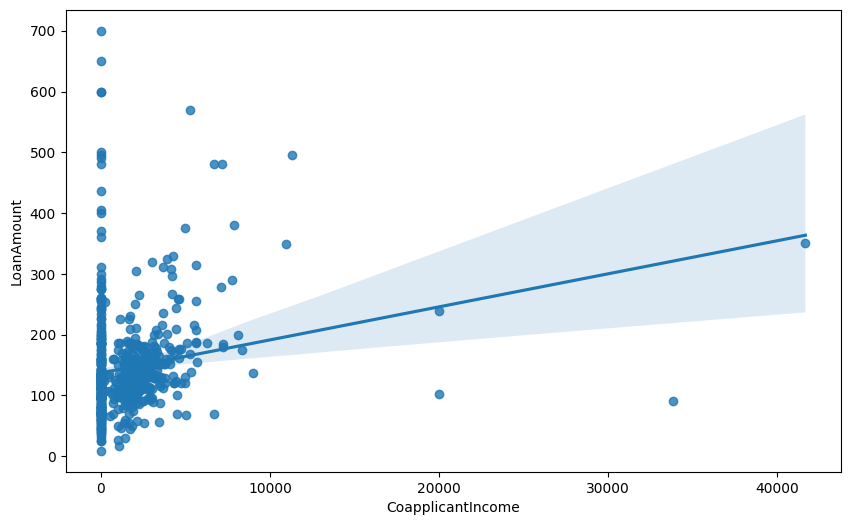

In [256]:
plt.figure(figsize=(10,6))
sns.regplot(x='CoapplicantIncome',y='LoanAmount',  data=data)
plt.show()

### Observations:

1.The plot shows that the loan amount is positively correlated with CoapplicantIncome and ApplicantIncome . This implies that the loan amount for higher income applicants is progressively higher.


2.There are some outliers visible, showing applicants with low coapplicantincome having been given loans of a higher amount.

<AxesSubplot: xlabel='Education', ylabel='count'>

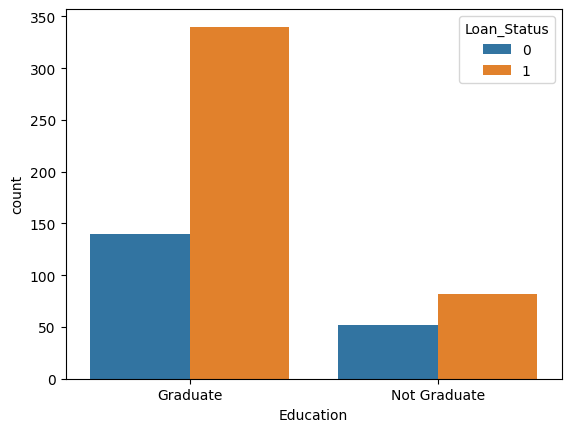

In [257]:
sns.countplot(x=data.Education, hue=data.Loan_Status)

## Observations:

We can see that graduate customers are more likely to get loans.

<AxesSubplot: xlabel='Gender', ylabel='count'>

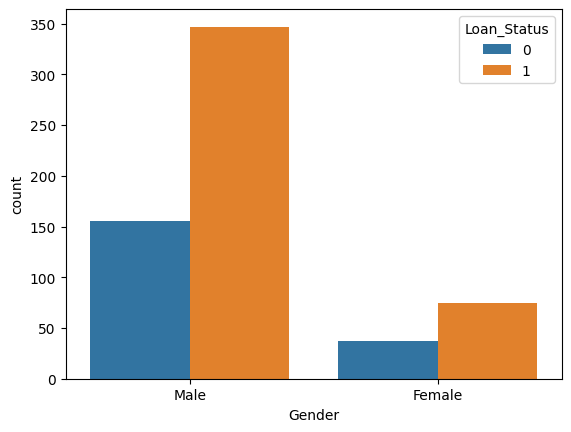

In [258]:
sns.countplot(data= data,x = 'Gender',hue = 'Loan_Status')

## Observations:

We can see that Male customers are more likely to get loans.

<AxesSubplot: xlabel='Married', ylabel='count'>

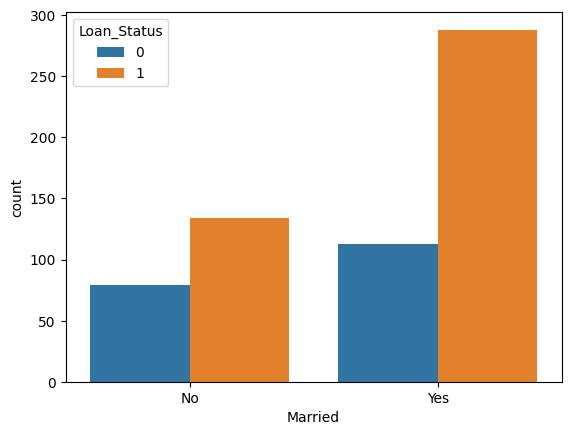

In [259]:
sns.countplot(data= data,x = 'Married',hue = 'Loan_Status')

## Observations:

We can see that Married customers are more likely to get loans.

<AxesSubplot: xlabel='Property_Area', ylabel='count'>

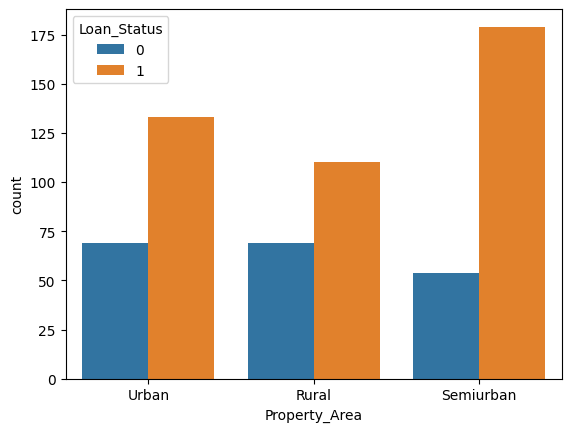

In [260]:
sns.countplot(data= data,x = 'Property_Area',hue = 'Loan_Status')

## Observations:

1.The plot shows that more loans are approved for properties in semi-urban areas.


2.This could be due to several reasons. The bank might be charging higher interest rates for semi-urban areas or the current customer base of the company from semi-urban areas might actually be more eligible for home loans based on loan applicant features. We cannot be certain as we don't have the data to support this claim.

<AxesSubplot: xlabel='Credit_History', ylabel='count'>

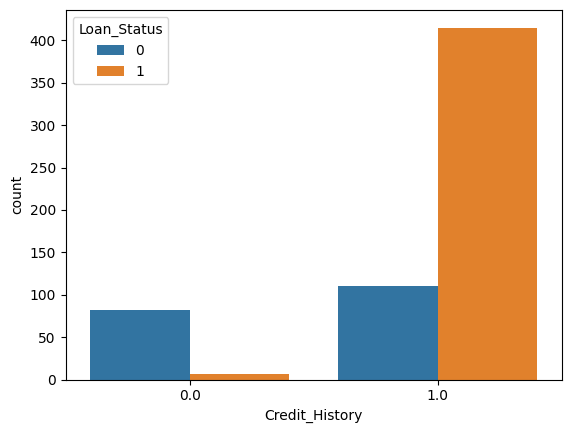

In [261]:
sns.countplot(data= data,x = 'Credit_History',hue = 'Loan_Status')

## Observations

1.The plot shows that credit history is an important factor while checking loan eligibility. There are very few customers whose loan was approved even when their credit history did not meet required guidelines.

#  Step 5:- Preparing Data for Modeling

Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables

In [262]:
data.replace({'Married':{'No':0,'Yes': 1}},inplace = True)

In [263]:
data.replace({'Education':{'Not Graduate':0,'Graduate': 1}},inplace = True)

In [264]:
data.replace({'Self_Employed':{'No':0,'Yes': 1}},inplace = True)

In [265]:
data.replace({'Gender':{'Female':0,'Male': 1}},inplace = True)

In [266]:
data.replace({'Property_Area':{'Rural':0,'Urban': 1,'Semiurban':2}},inplace = True)

In [267]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


<AxesSubplot: >

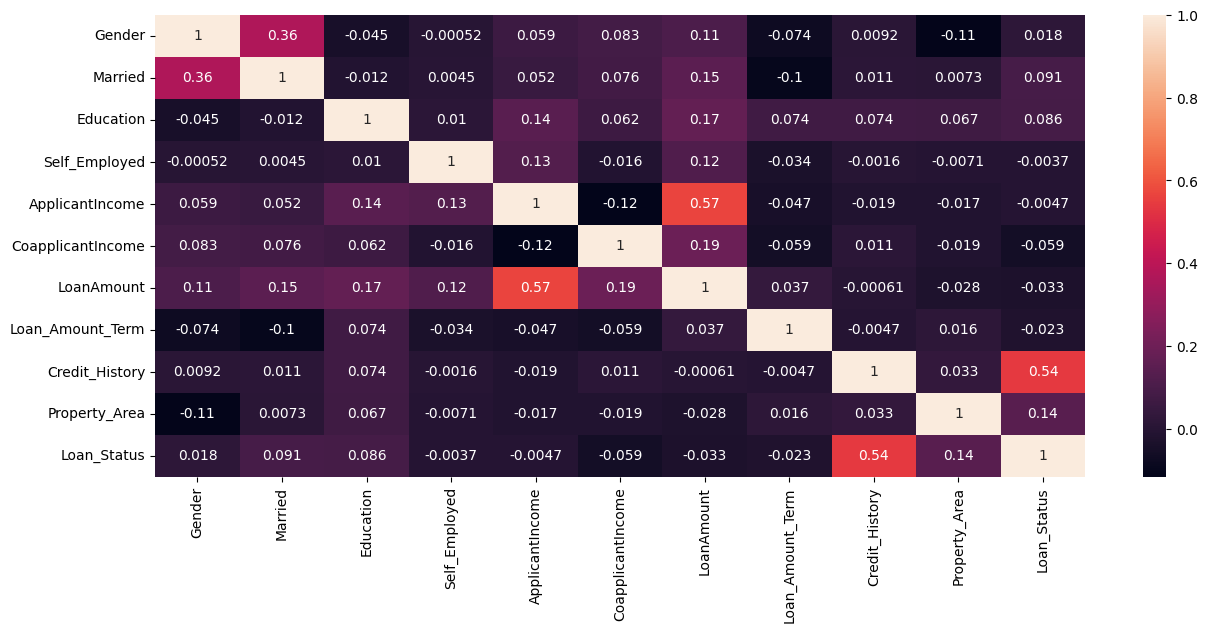

In [268]:
plt.figure(figsize=(15,6))

sns.heatmap(data.corr(),annot = True)

# Step 6:- Train-Test Split 

In [269]:
#diving the data into dependent and independent variables
x = data.drop(columns = ['Loan_Status','Loan_ID'],axis =1)
y = data['Loan_Status']

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [272]:
x_train.shape

(491, 11)

In [273]:
x_test.shape

(123, 11)

In [274]:
 y_train.shape

(491,)

In [275]:
y_test.shape

(123,)

# Step 7:- Building Classification Models

## 1. Logistic Regression Model

In [276]:
from sklearn.linear_model import LogisticRegression

In [277]:
lm = LogisticRegression()
lm.fit(x_train,y_train)
predictions = lm.predict(x_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [278]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [279]:
print(confusion_matrix(y_test,predictions))

[[19 24]
 [ 1 79]]


In [280]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
           1       0.77      0.99      0.86        80

    accuracy                           0.80       123
   macro avg       0.86      0.71      0.73       123
weighted avg       0.83      0.80      0.77       123



In [281]:
accuracy_score(y_test,predictions)

0.7967479674796748

## observation
1.We see around 80% accuracy on our test dataset.


2.The recall score is only 44% for class 0. 

# 2. Naive Bayes Classifier

In [282]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12,stratify=y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(491, 11) (123, 11) (491,) (123,)


In [283]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

In [284]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [285]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.34      0.48        38
           1       0.77      0.96      0.85        85

    accuracy                           0.77       123
   macro avg       0.79      0.65      0.67       123
weighted avg       0.78      0.77      0.74       123



In [286]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7723577235772358


## observation
1.We see around 77% accuracy on our test dataset.


2.The recall score is only 34% for class 0. 

# 3. Dession Tree Classifier

In [303]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [304]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(x_train, y_train)

In [305]:
y_pred=model.predict(x_test)

In [306]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [307]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.42      0.45        38
           1       0.76      0.80      0.78        85

    accuracy                           0.68       123
   macro avg       0.62      0.61      0.61       123
weighted avg       0.67      0.68      0.68       123



In [308]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6829268292682927


## observation
1.We see around 68% accuracy on our test dataset.


2.The recall score is only 42% for class 0. 

# 4. Random Forest Classifier

In [293]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
model=clf.fit(x_train, y_train)

In [294]:
y_pred=model.predict(x_test)

In [295]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [296]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.32      0.47        38
           1       0.76      0.99      0.86        85

    accuracy                           0.78       123
   macro avg       0.84      0.65      0.67       123
weighted avg       0.81      0.78      0.74       123



In [297]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7804878048780488


## observation
1.We see around 78% accuracy on our test dataset.


2.The recall score is only 32% for class 0. 

# Step 8 :- Model evaluation criterion:

Since this is a binary classification problem, the model can make wrong predictions in one of two ways:

1.Predicting a customer is not eligible for a loan when the customer actually is eligible - Loss of opportunity.


2.Predicting a customer is eligible for a loan when the customer is actually not - Financial loss.


Which case is more important?


Predicting that the customer is eligible when he is not, because the person might default or not be able to return the loan, which would result in financial loss to the company.


How to reduce this loss i.e need to reduce False Negatives?


In classification, the class of interest is considered the positive class. Here, the class of interest is 0 i.e. identifying non-eligible customers. So, the company wants to minimize the number of false negatives, in other words Recall is the evaluation criterion to be maximized.

# Conclusion
1.Using multiple models, EDA, and visualization, we were able to identify the key factors that are involved with whether or not a loan application will be accepted, with the biggest one being credit history.



2.Our Logistic regression model gave thet highest recall score which is the measure that we wanted to maximize, since we don't want to grant loans to applicants who are unable to repay them, since it would hurt the company.